In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


In [ ]:
df = pd.read_csv('/content/Dataset_credit_risk.csv')

In [ ]:
df


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
df.shape


(614, 13)

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [ ]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

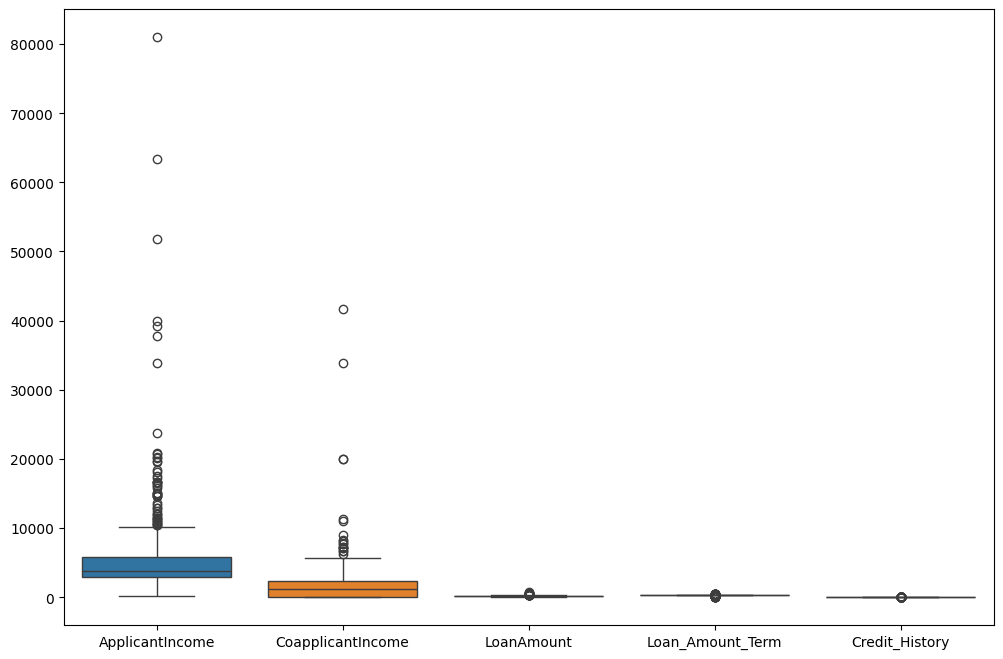

In [ ]:
#finding the outliers
plt.figure(figsize=(12,8))
sns.boxplot(data=df)

In [ ]:
#filling missing values of numerical datatype
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())


In [ ]:
df['LoanAmount'].median()


128.0

In [ ]:
df['LoanAmount'].mean()

145.75244299674267

In [ ]:
#filling the objects datatype
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])


In [ ]:
df['Gender'].mode()[0]

'Male'

In [ ]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [ ]:
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])

In [ ]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Loan by gender
Male      502
Female    112
Name: Gender, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

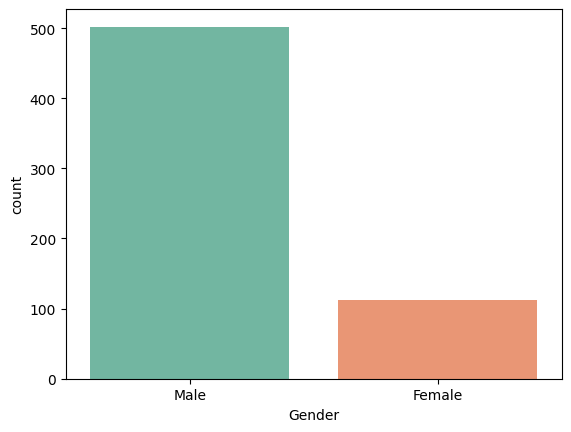

In [ ]:
print('Loan by gender')
print(df['Gender'].value_counts())
sns.countplot(x='Gender',data=df,palette='Set2')

Loan by maritial status
Yes    401
No     213
Name: Married, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

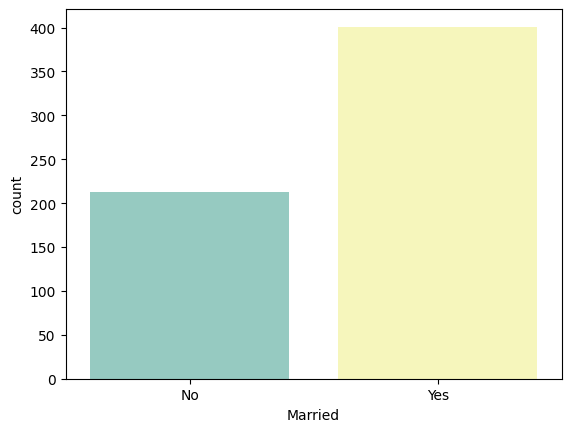

In [ ]:
print('Loan by maritial status')
print(df['Married'].value_counts())
sns.countplot(x='Married',data=df,palette='Set3')

Loan by education  status
Graduate        480
Not Graduate    134
Name: Education, dtype: int64


<Axes: xlabel='Education', ylabel='count'>

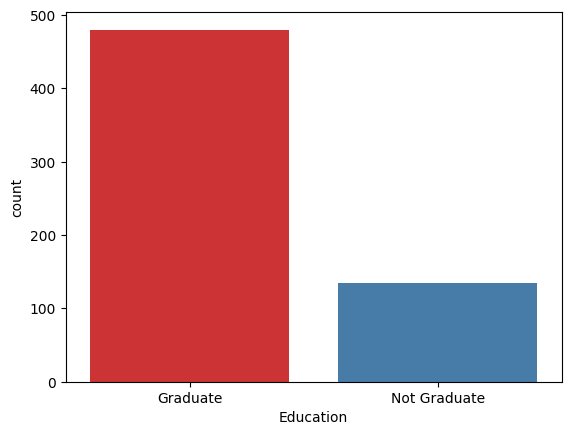

In [ ]:
print('Loan by education  status')
print(df['Education'].value_counts())
sns.countplot(x='Education',data=df,palette='Set1')

In [ ]:
corr = df.corr()
corr

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565181,-0.045242,-0.014477
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059675,-0.001665
LoanAmount,0.565181,0.189218,1.000000,0.039235,-0.007031
Loan_Amount_Term,-0.045242,-0.059675,0.039235,1.000000,0.001395
Credit_History,-0.014477,-0.001665,-0.007031,0.001395,1.000000


<Axes: >

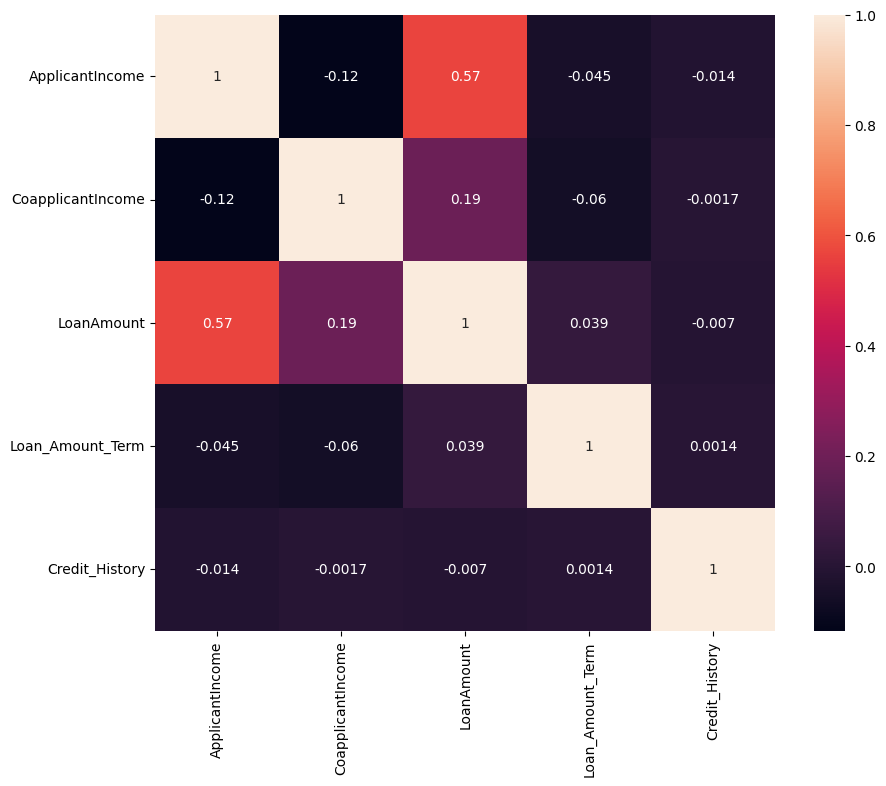

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True)

In [ ]:
#creating total income=coapplicant + applicant income
df['Total_Income']=df['ApplicantIncome']+df['CoapplicantIncome']


In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


In [ ]:
#appying log transformation fpr normal distrtibution
df['ApplicantIncome_log']=np.log(df['ApplicantIncome']+1)

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,8.674197
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,8.430327
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,8.006701
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,7.857094
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,8.699681


<Axes: xlabel='ApplicantIncome_log', ylabel='Density'>

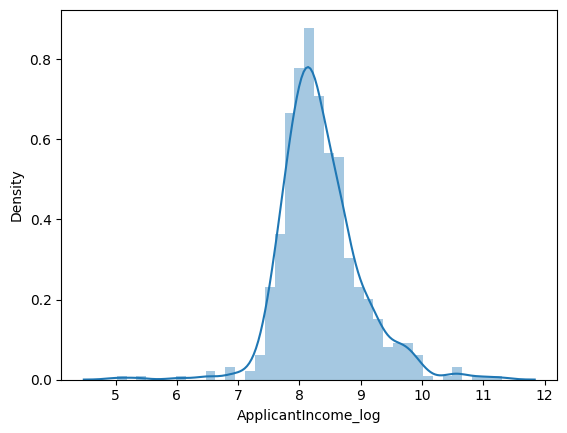

In [ ]:
sns.distplot(df['ApplicantIncome_log'])

<Axes: xlabel='LoanAmount_log', ylabel='Density'>

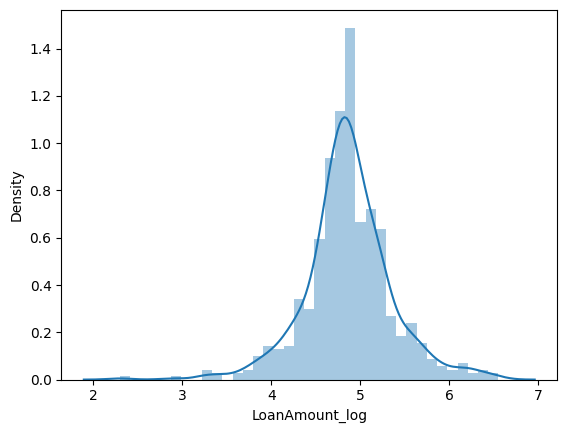

In [ ]:
df['LoanAmount_log']=np.log(df['LoanAmount']+1)
sns.distplot(df['LoanAmount_log'])

<Axes: xlabel='Loan_Amount_Term_log', ylabel='Density'>

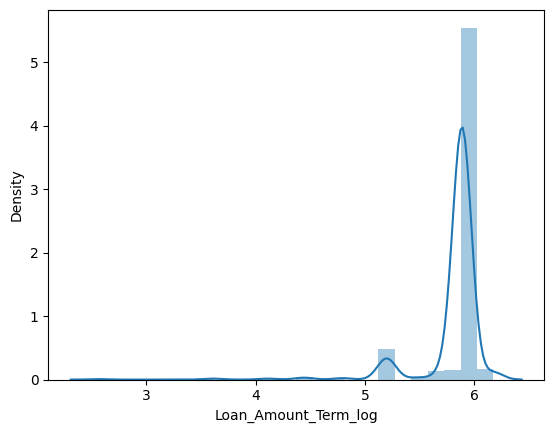

In [ ]:
df['Loan_Amount_Term_log']=np.log(df['Loan_Amount_Term']+1)
sns.distplot(df['Loan_Amount_Term_log'])

<Axes: xlabel='Total_Income_log', ylabel='Density'>

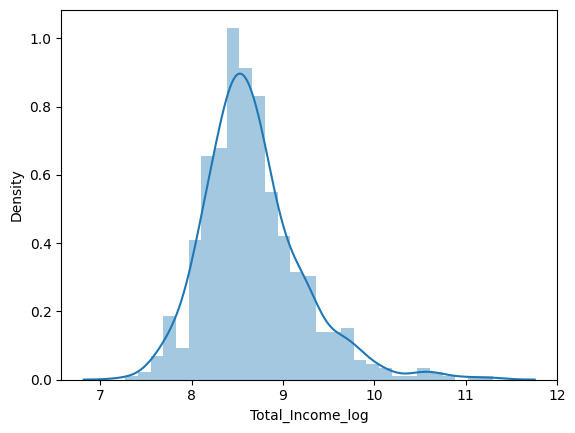

In [ ]:
df['Total_Income_log']=np.log(df['Total_Income']+1)
sns.distplot(df['Total_Income_log'])

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncome_log,LoanAmount_log,Loan_Amount_Term_log,Total_Income_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,8.674197,4.859812,5.888878,8.674197
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,8.430327,4.859812,5.888878,8.714732
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,8.006701,4.204693,5.888878,8.006701
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,7.857094,4.795791,5.888878,8.505525
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,8.699681,4.955827,5.888878,8.699681


In [ ]:
#dropping unnecesarry columns
col=['Loan_ID','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Total_Income']
df = df.drop(columns=col,axis=1)

In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncome_log,LoanAmount_log,Loan_Amount_Term_log,Total_Income_log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674197,4.859812,5.888878,8.674197
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430327,4.859812,5.888878,8.714732
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006701,4.204693,5.888878,8.006701
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.857094,4.795791,5.888878,8.505525
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699681,4.955827,5.888878,8.699681


In [ ]:
#encoding technique : label encoding , one hot encoding
from sklearn.preprocessing import LabelEncoder
cols=['Married','Gender','Education','Self_Employed','Dependents','Property_Area','Loan_Status']
le=LabelEncoder()
for col in cols:
   df[col] = le.fit_transform(df[col])


In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncome_log,LoanAmount_log,Loan_Amount_Term_log,Total_Income_log
0,1,0,0,0,0,1.0,2,1,8.674197,4.859812,5.888878,8.674197
1,1,1,1,0,0,1.0,0,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.0,2,1,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.0,2,1,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.0,2,1,8.699681,4.955827,5.888878,8.699681


In [ ]:
#spliting dependent and independent variables (as loan status in only dependent variable)
X = df.drop(columns = ['Loan_Status'],axis=1)#storing all the independent variables i.e all except loan status
y = df['Loan_Status']#storing loan status as dependent variable



In [ ]:
X


,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome_log,LoanAmount_log,Loan_Amount_Term_log,Total_Income_log
0,1,0,0,0,0,1.0,2,8.674197,4.859812,5.888878,8.674197
1,1,1,1,0,0,1.0,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.0,2,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.0,2,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.0,2,8.699681,4.955827,5.888878,8.699681
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,1.0,0,7.972811,4.276666,5.888878,7.972811
610,1,1,3,0,0,1.0,0,8.320448,3.713572,5.198497,8.320448
611,1,1,1,0,0,1.0,2,8.996280,5.537334,5.888878,9.025576
612,1,1,2,0,0,1.0,2,8.933796,5.236442,5.888878,8.933796


In [ ]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
#logistic regression
model1 = LogisticRegression()
model1.fit(X_train,y_train)
y_pred=model1.predict(X_test)
accuracy1=accuracy_score(y_test,y_pred)
print("accuracy of logistic regression is", accuracy1*100)

accuracy of logistic regression is 77.27272727272727


In [ ]:
accuracy1


0.7727272727272727

In [ ]:
#accuracy using cross validation score (confusion matrix) of logistic regression
score1=cross_val_score(model1,X,y,cv=5)
score1

array([0.81300813, 0.7804878 , 0.7804878 , 0.85365854, 0.81967213])

In [ ]:
print("cross validation score of logistic regression is ",np.mean(score1)*100)

cross validation score of logistic regression is  80.9462881514061


In [ ]:
#decision tree clssifier
model2=DecisionTreeClassifier()
model2.fit(X_train,y_train)
y_pred=model2.predict(X_test)
accuracy2=accuracy_score(y_pred,y_test)
print("accuracy of decision tree is", accuracy2*100)

accuracy of decision tree is 72.07792207792207


In [ ]:
score2=cross_val_score(model2,X,y,cv=5)
print("cross validation score of decision tree is ",np.mean(score2)*100)

cross validation score of decision tree is  70.35852325736373


In [ ]:
#Random Forest Classifier
model3=RandomForestClassifier()
model3.fit(X_train,y_train)
y_pred=model3.predict(X_test)
accuracy3=accuracy_score(y_pred,y_test)
print("accuracy of random forest classifier is", accuracy3*100)

accuracy of decision tree is 77.27272727272727


In [ ]:
#KNeighbor classifier
model4=KNeighborsClassifier(n_neighbors=3)
model4.fit(X_train,y_train)
y_pred=model4.predict(X_test)
accuracy4=accuracy_score(y_pred,y_test)
print("accuracy of Kneigbor is", accuracy4*100)

accuracy of Kneigbor is 71.42857142857143


In [ ]:
score4=cross_val_score(model4,X,y,cv=3)
print("cross validation score of KNeighbor is ",np.mean(score4)*100)

cross validation score of KNeighbor is  73.94229236410011
